# Importing Required Libraries

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

import seaborn as sn

import matplotlib.pyplot as plt
from sklearn import tree

#Importing (Reading) Datasets

In [2]:
data=pd.read_csv('/content/Breast Cancer Detection Classification Master.csv')


In [3]:
print(data.shape)
data.head()

(569, 32)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


#Assigning dependent and independent variables

In [4]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

# splitting the dataset into Training and Testing Dataset

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=41)

#Preprocessing Data with StandardScaler

In [6]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

#Fitting the Model

In [7]:
model=RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

#Evaluation Metrics

In [8]:
print('Random Forest Classifier')
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix : \n', conf_mat)
Accuracy_score=accuracy_score(y_test,y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
print('\n',classification_report(y_pred,y_test))

Random Forest Classifier

 Confusion Matrix : 
 [[110   0]
 [  1  60]]
Accuracy Score :  0.9941520467836257
Accuracy in Percentage :  99 %

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       111
           1       0.98      1.00      0.99        60

    accuracy                           0.99       171
   macro avg       0.99      1.00      0.99       171
weighted avg       0.99      0.99      0.99       171



[Text(0.5, 1.0, 'Random Forest Classifier')]

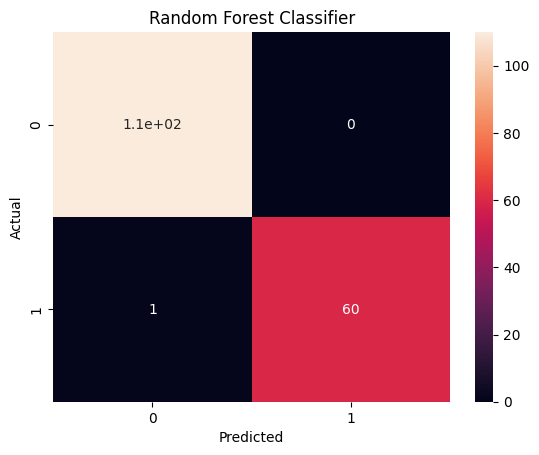

In [9]:
conf_mat=pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='Random Forest Classifier')

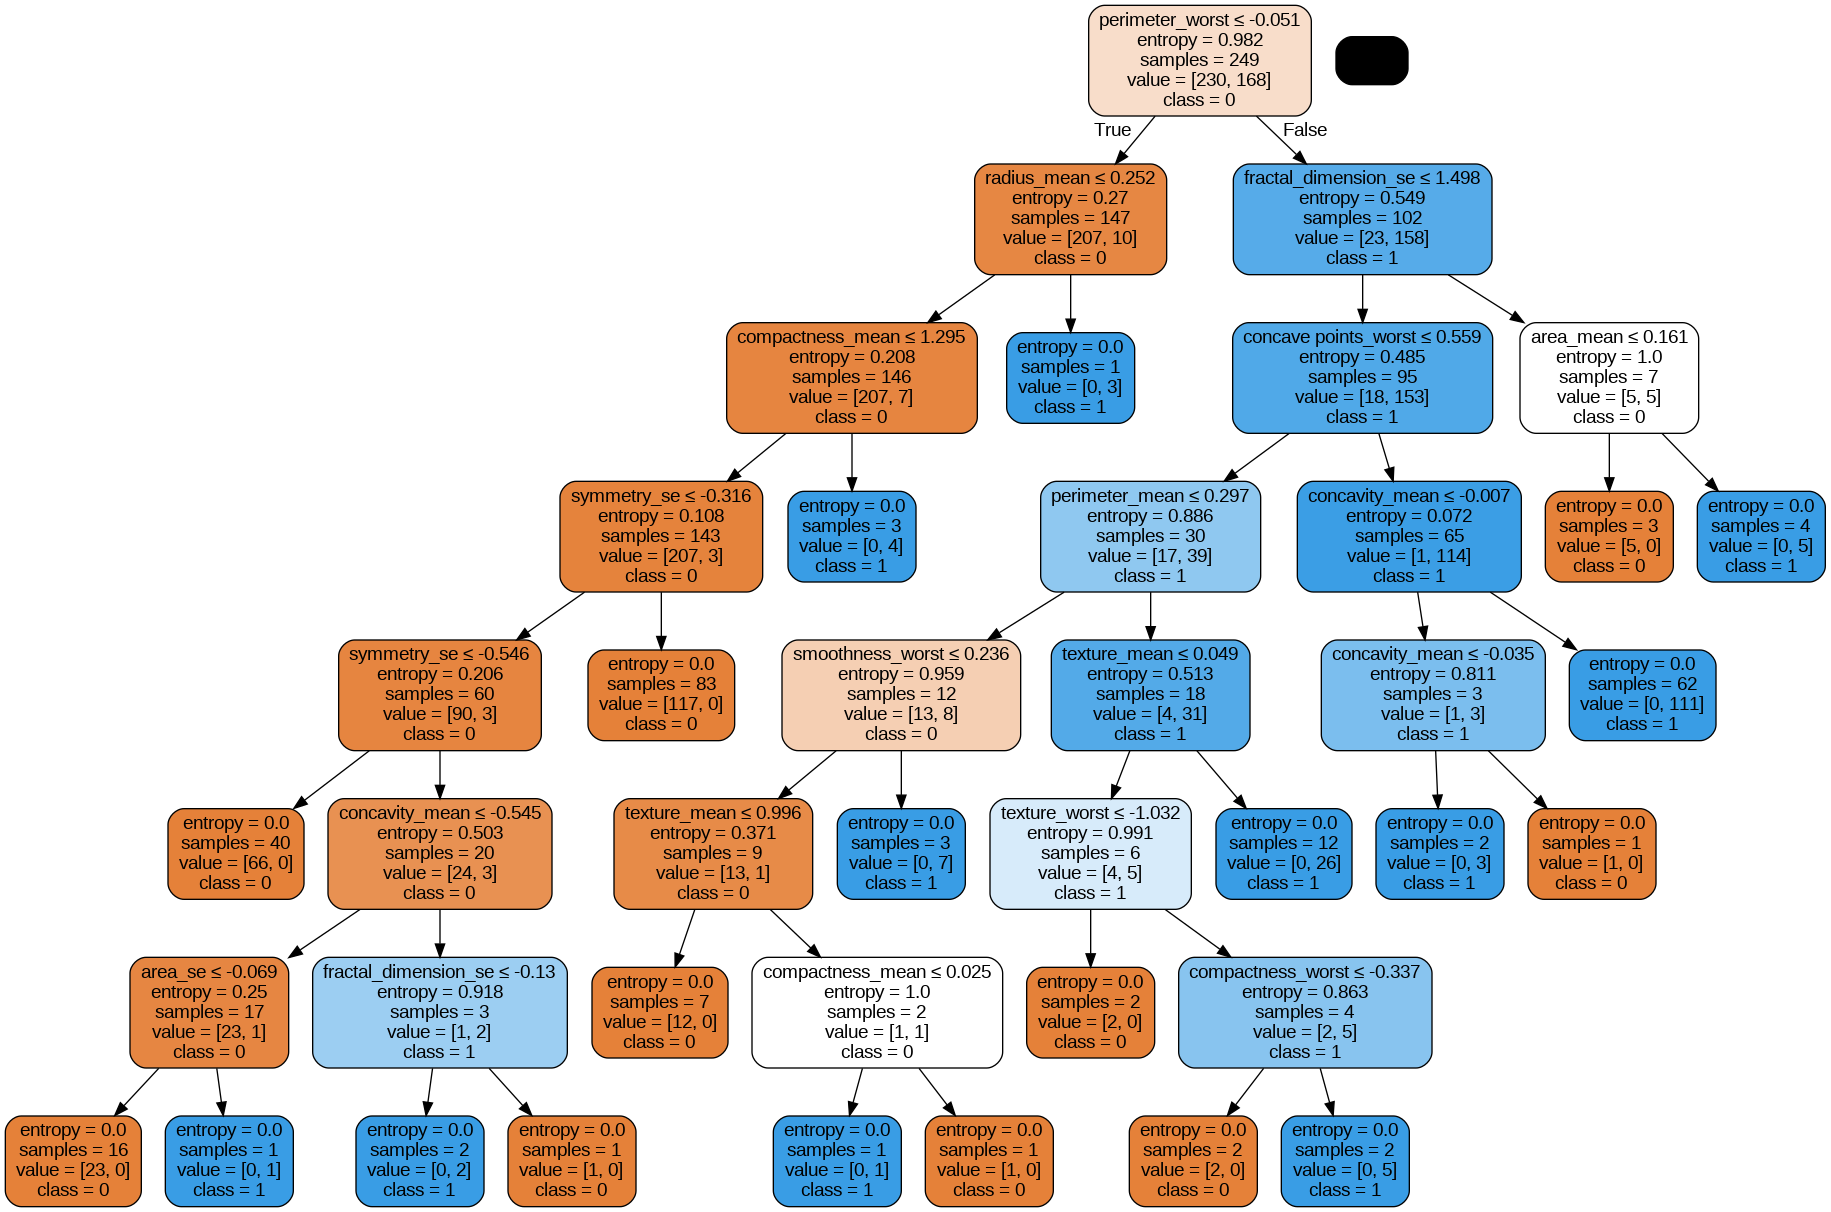

In [10]:
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(model.estimators_[0], out_file=None, 
                                feature_names=data.columns[:-1],  
                                class_names=['0', '1'],  
                                filled=True, rounded=True,  
                                special_characters=True) 

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)  

# Generate image
Image(graph.create_png())